<img src="images/cads-logo.png" style="height: 100px;" align=left> 

# DA Capstone

1. Create a team (2-3 people)
2. Perform the following:
    1. **Data Wrangling - Cleaning & Merging**: Check and handle the existance of missing values, the type of variables, or integrity of data
    2. **Exploratory Data Analysis**: Analyze data to summarize their main characteristics
    3. **Feature Engineering**: Make new features or change the current features
    4. **Feature Selection**: Choose the best features
    5. **Queries** Use SQL to query the data

## Submission Guideline
The output expected at the end of this hackathon is:
1. One **Jupyter notebook** containing all analysis performed using Python.
2. One **PowerPoint** presentation containing the analysis results. Each group will be allocated 15-20 minutes (inclusive of Q&A) to present their analysis results to the class.
3. One **Final Dataset** - in csv format

One zip file per group is to be uploaded on GDrive **by 2:30 pm of the last day**, including the jupyter notebook(s) and the powerpoint presentation indicating the names of all group members.


## Presentation Guideline


**Note(s):**
1. Only **one submission** is required per group.
2. Include full details in your notebook and **report only important results** in your presentation.
3. Please only use Jupyter notebook (pandas) to clean the data (Do not clean manually using Excel)

## Objective
**Perform Exploratory Data Analysis for the Dataset Provided uisng Python, then load the data into a database using pandas and Solve the queries. The dataset is about customer purchasing history, and focused on determining potential customers.**

You have been provided with information such as customers spending for last sevral years, the amount of money spent,Number of inactive months and so on

## Data description
- Below is the description of each feature available in the dataset
<img src="images/MicrosoftTeams-image.png" style="height: 700px">

##  Import necessary Packages

In [330]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#Your Code Here

### Load the Data into Pandas Dataframe

In [331]:
# Load the data into data dataframe
#Your Code Here
data_ori = pd.read_csv('data.csv')
data = data_ori.copy()

In [332]:
# View first 5 rows of the dataframe
#Your Code Here
data.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,$5.00,2,17,2,4,$0.00,$7.50,$7.76,...,73,3,12,16,A,0,71.0,F,H,"$65,957.00"
1,1,87939,$30.00,1,7,0,3,$25.00,$25.00,$13.00,...,55,6,6,22,A,1,7.0,M,U,$0.00
2,0,88003,NaN,5,12,3,5,$15.00,$15.00,$11.25,...,53,6,17,22,S,1,79.0,F,U,$0.00
3,1,188721,$20.00,1,11,0,3,$20.00,$20.00,$12.45,...,71,8,8,33,A,0,73.0,F,U,"$76,293.00"
4,1,88056,$5.00,3,15,2,7,$3.00,$4.33,$3.80,...,63,6,12,24,S,1,68.0,F,H,"$113,663.00"


In [333]:
# View your data
#Your Code Here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

# <font color=green>Data Cleaning<font>
Checking the existance of missing values, the type of variables, or integrity of data.

### How big is the dataset? (number of rows, features and total datapoints)

In [334]:
#Your Code Here
print(f"There is {data.shape[0]} rows of data with {data.shape[1]} feature.")

There is 4469 rows of data with 25 feature.


### What columns do we have?

In [335]:
#Your Code Here
# Check the columns using the DataFrame
for col_name in enumerate(data.columns):
    print(col_name)

(0, 'Potential_Customer')
(1, 'C_ID')
(2, 'Cust_Last_Purchase')
(3, 'Pur_3_years')
(4, 'Pur_5_years')
(5, 'Pur_3_years_Indirect')
(6, 'Pur_5_years_Indirect')
(7, 'Pur_latest')
(8, 'Pur_3_years_Avg')
(9, 'Pur_5_years_Avg')
(10, 'Pur_3_years_Avg_Indirect')
(11, 'InAct_Last')
(12, 'InAct_First')
(13, 'Ad_Res_1_year')
(14, 'Ad_Res_3_Year')
(15, 'Ad_Res_5_Year')
(16, 'Ad_Res_Ind_1_Year')
(17, 'Ad_Res_Ind_3_Year')
(18, 'Ad_Res_Ind_5_Year')
(19, 'Status_Cust')
(20, 'Status_Latest_Ad')
(21, 'Age')
(22, 'Gender')
(23, 'Cust_Prop')
(24, 'Cust_Ann_Income')


### What is the type of each column?



In [336]:
#Your Code Here
data.dtypes

Potential_Customer            int64
C_ID                          int64
Cust_Last_Purchase           object
Pur_3_years                   int64
Pur_5_years                   int64
Pur_3_years_Indirect          int64
Pur_5_years_Indirect          int64
Pur_latest                   object
Pur_3_years_Avg              object
Pur_5_years_Avg              object
Pur_3_years_Avg_Indirect     object
InAct_Last                    int64
InAct_First                   int64
Ad_Res_1_year                 int64
Ad_Res_3_Year                 int64
Ad_Res_5_Year                 int64
Ad_Res_Ind_1_Year             int64
Ad_Res_Ind_3_Year             int64
Ad_Res_Ind_5_Year             int64
Status_Cust                  object
Status_Latest_Ad              int64
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income              object
dtype: object

### Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`?

#### Notice Some features have Dollar AND Comma. Remove the dollar sign and comma from these features

**Hint:** You can use `df.col=df.col.str.replace('OldSign', 'NewSign')`

In [337]:
#Your Code Here
lis_rep = ['Cust_Last_Purchase', 'Pur_latest', 'Pur_3_years_Avg', \
           'Pur_5_years_Avg', 'Pur_3_years_Avg_Indirect','Cust_Ann_Income']

for to_rep in lis_rep:
    data[to_rep] = data[to_rep].str.replace('$','').str.strip() 
    data[to_rep] = data[to_rep].str.replace(',','').str.strip().astype('float')
    

In [338]:
data.head(3)

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,5.0,2,17,2,4,0.0,7.5,7.76,...,73,3,12,16,A,0,71.0,F,H,65957.0
1,1,87939,30.0,1,7,0,3,25.0,25.0,13.00,...,55,6,6,22,A,1,7.0,M,U,0.0
2,0,88003,NaN,5,12,3,5,15.0,15.0,11.25,...,53,6,17,22,S,1,79.0,F,U,0.0


### Check data for duplicate rows

In [339]:
# # Is there any duplicate in the data
# #Your Code Here
# print(f"is there any duplicated rows?, {data.duplicated().any()}.")

In [340]:
# Find the number of duplicates
#Your Code Here
# print(f"The total of duplicated rows is {data.duplicated().sum()}.")

### Remove duplicate rows
**Hint:** Use `df=df.drop_duplicates()`

In [341]:
# Remove duplicates
#Your Code Here
data = data.drop_duplicates()

### Do we need `C_ID` in our analysis?

In [342]:
#Your Code Here
# For future use this column can be used for primary keys to merge data
# But since there no use for the current analysis, we will drop it
data = data.drop(columns='C_ID')

### Check whether the columns' types are accurate? if not handle them


In [343]:
#Your Code Here
data.info()
# seems like everything as it should be, unless
# maybe object type can be converted into category type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        3618 non-null   int64  
 1   Cust_Last_Purchase        1736 non-null   float64
 2   Pur_3_years               3618 non-null   int64  
 3   Pur_5_years               3618 non-null   int64  
 4   Pur_3_years_Indirect      3618 non-null   int64  
 5   Pur_5_years_Indirect      3618 non-null   int64  
 6   Pur_latest                3618 non-null   float64
 7   Pur_3_years_Avg           3618 non-null   float64
 8   Pur_5_years_Avg           3618 non-null   float64
 9   Pur_3_years_Avg_Indirect  2956 non-null   float64
 10  InAct_Last                3618 non-null   int64  
 11  InAct_First               3618 non-null   int64  
 12  Ad_Res_1_year             3618 non-null   int64  
 13  Ad_Res_3_Year             3618 non-null   int64  
 14  Ad_Res_5

# <font color=green>Exploratory Data Analysis (EDA)<font>
Checking the relationship of variables, summary of data, outliers, filling missing values etc.

## Explore Categorical Variables

In [344]:
# sns.relplot()
# sns.catplot()
# Status_Cust Gender Cust_Prop 

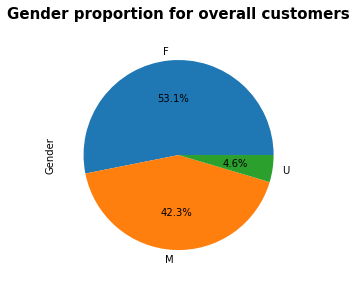

In [345]:
# Gender proportion for overall customers
data.Gender.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Gender proportion for overall customers', weight='bold', fontsize=15, y=1.05)
plt.tight_layout();
# Female customers dominated the male customers with 10.8% 
# Add more market segment for male customers
# More product for male customers

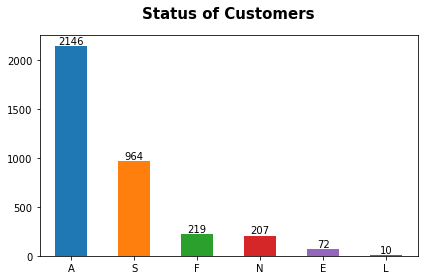

In [346]:
#Your Code Here
color_palette = sns.color_palette()
ax = data.Status_Cust.value_counts().plot.bar(color=color_palette)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=0)
plt.title('Status of Customers', weight='bold', fontsize=15, y=1.05)
plt.tight_layout()

# To reduce some redundancy, some categorical status can be merge together.
# A-Active, S-Star, (F and N)-New buyer, (E and L)-Inactive buyer.
# ...

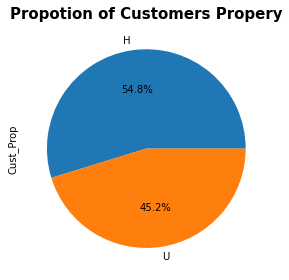

In [347]:
# Gender proportion for overall customers
data.Cust_Prop.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Propotion of Customers Propery', fontsize=15, weight='bold')
plt.tight_layout();
# Most of the customers owns a house/property
# But for unknown cutomer, we can identify if they own a prop by analyzing their annual income and etc.
# We can set a bar based on how much annual income of customer with property to label the unknown customer

### Explore Relationship Between Categorical & Target Variable

**Hint**: use `sns.countplot()` plot

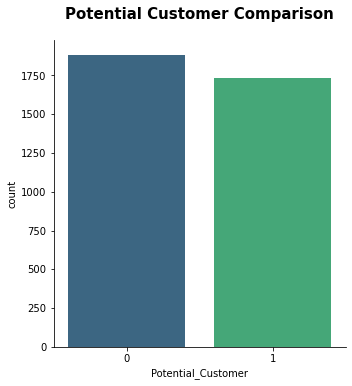

In [348]:
sns.catplot(data=data, x='Potential_Customer', kind='count', palette='viridis');
plt.title('Potential Customer Comparison', fontsize=15, weight='bold', y=1.05);
# The unlikely potential customer (PC) is greater than likely PC

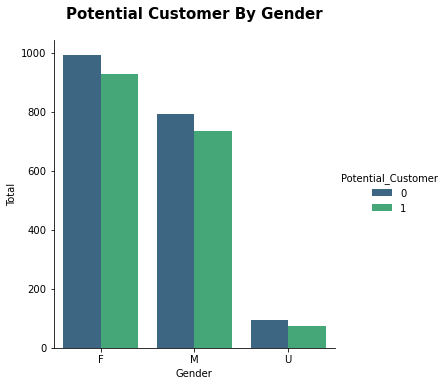

In [349]:
sns.catplot(data=data, x='Gender', hue='Potential_Customer', kind='count', palette='viridis');
plt.title('Potential Customer By Gender', fontsize=15, weight='bold', y=1.05);
plt.ylabel('Total');
# ...
# ...

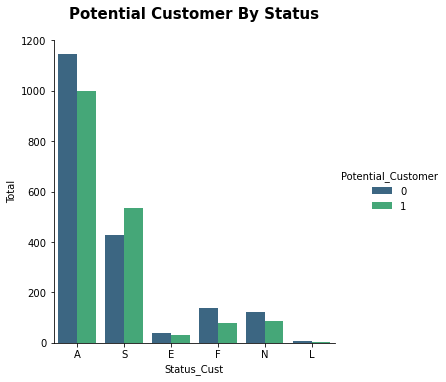

In [350]:
# Your Code Here
# Status_Cust Gender Cust_Prop 
sns.catplot(data=data, x='Status_Cust', hue='Potential_Customer', kind='count', palette='viridis');
plt.title('Potential Customer By Status', fontsize=15, weight='bold', y=1.05);
plt.ylabel('Total');
# 
# ...

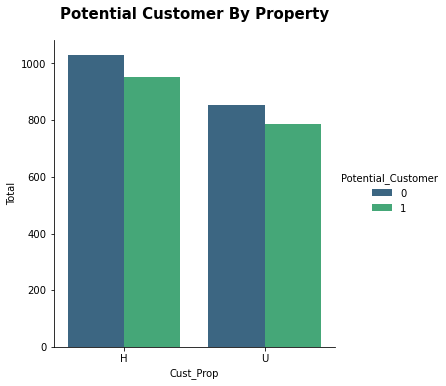

In [351]:
# Your Code Here
# Status_Cust Gender Cust_Prop 
sns.catplot(data=data, x='Cust_Prop', hue='Potential_Customer', kind='count', palette='viridis');
plt.title('Potential Customer By Property', fontsize=15, weight='bold', y=1.05);
plt.ylabel('Total');
# 
# ...

## Explore Numerical Variables

**Hint**: use `sns.distplot()` and `sns.boxplot()`

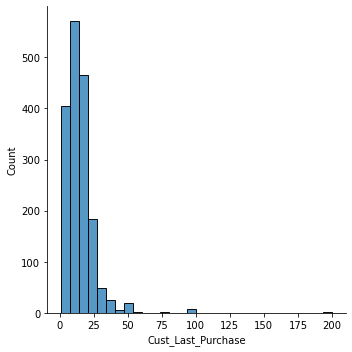

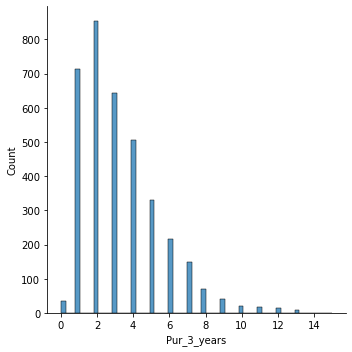

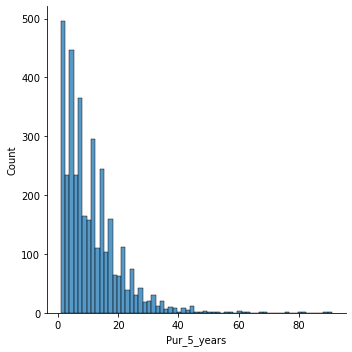

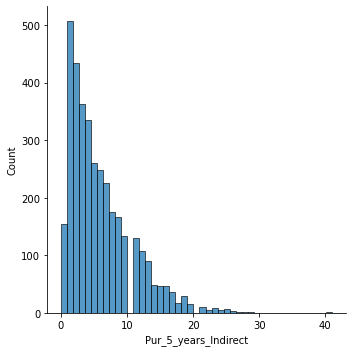

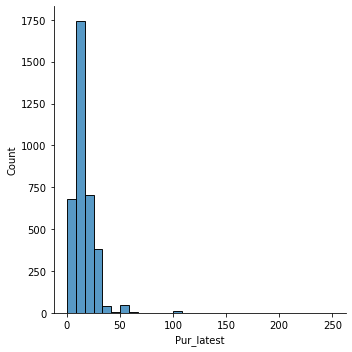

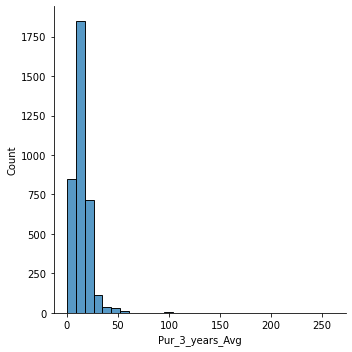

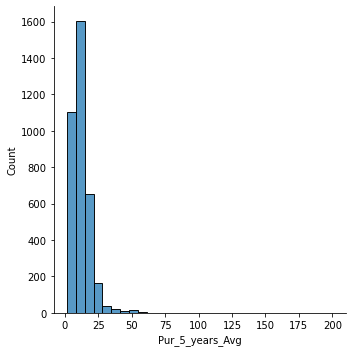

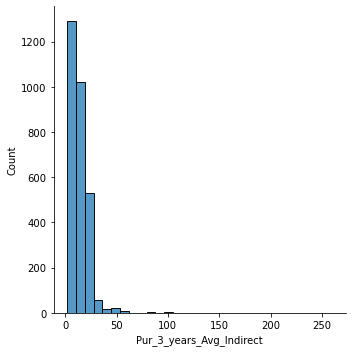

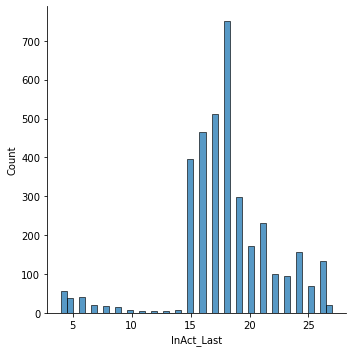

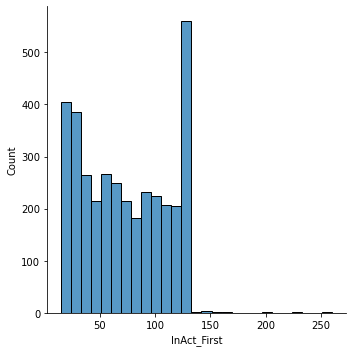

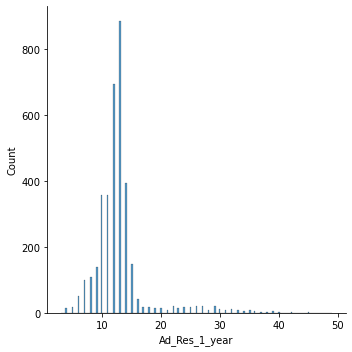

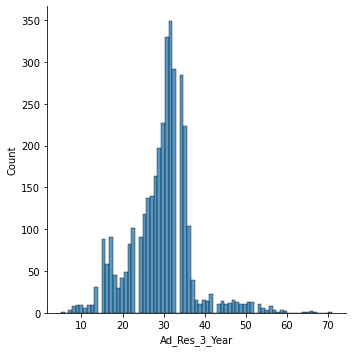

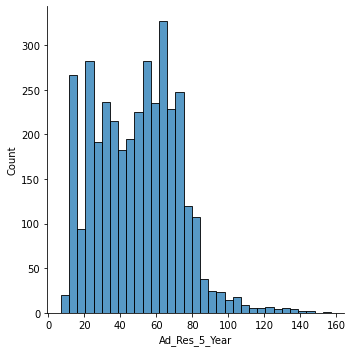

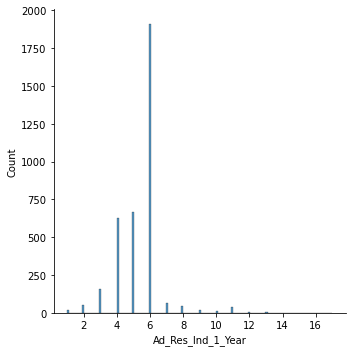

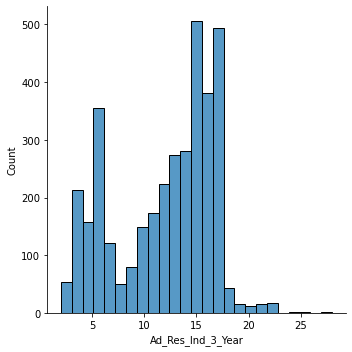

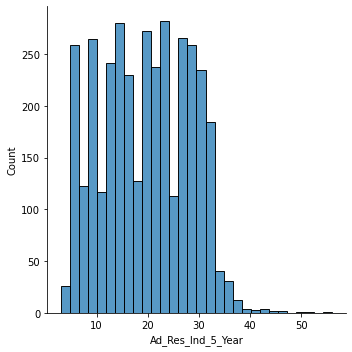

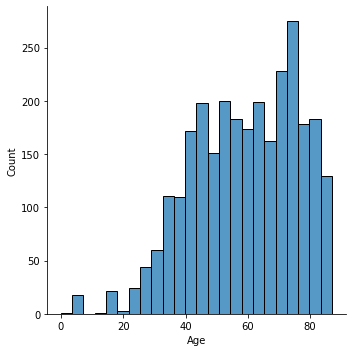

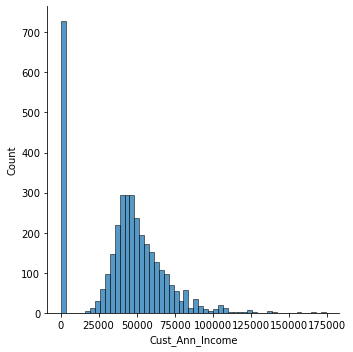

In [352]:
m1 = data.columns[data.nunique() > 10]
m2 = data.columns[data.dtypes == 'object']
lis = []
for i in m1:
    if i not in m2:
        lis.append(i)
        
for num_att in lis:
    if num_att not in ['Cust_Last_Purchase','Pur_latest','Pur_3_years_Avg','Pur_5_years_Avg','Pur_3_years_Avg_Indirect']:
        sns.displot(data=data, x=num_att)
    else:
        sns.displot(data=data, x=num_att, bins=30)

In [353]:
# #Your Code Here
# sns.pairplot(data=data, vars=lis, hue='Potential_Customer');

###  Check the skewness and kurtosis of the variables? Is it normal? Document your process in the notebook of handling skewness and kurtosis


In [354]:
data_kurt = data.loc[:,lis]
data_kurt.head(3)

,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Age,Cust_Ann_Income
0,5.0,2,17,4,0.0,7.5,7.76,7.50,14,110,32,48,73,3,12,16,71.0,65957.0
1,30.0,1,7,3,25.0,25.0,13.00,NaN,18,75,13,35,55,6,6,22,7.0,0.0
2,NaN,5,12,5,15.0,15.0,11.25,14.67,19,57,14,35,53,6,17,22,79.0,0.0


## Identifying type of skewness for numeric columns

In [355]:
# Filtering to numerical columns with more than 5 unique values
m1 = data.columns[data.nunique() > 10]
m2 = data.columns[data.dtypes == 'object']
lis = []
for i in m1:
    if i not in m2:
        lis.append(i)
# masking        
data_skew = data.loc[:,lis]   

# assign the skew type for each columns
skew_df = pd.DataFrame(data_skew.skew().sort_values(), columns=['skewness_Value'])
val1 = skew_df.values.reshape(len(skew_df),)

skew_df.head(18)
col_type1 = []
# if the value close to zero represent symmtric distribution
# greater than 1 (highly positively skewed) or closer to -1 (highly negatively skewed)

for i in val1:
    if i > 0.1:
        col_type1.append('positively skewed')
    elif (i < 0.1) and (i >= 0):
        col_type1.append('symmtric')
    elif (i > -0.1) and (i <= 0):
        col_type1.append('symmtric')
    else:
        col_type1.append('negatively skewed')
        
skew_df['kurtosis_type'] = col_type1
skew_df.head(18)

,skewness_Value,kurtosis_type
InAct_Last,-0.808274,negatively skewed
Ad_Res_Ind_3_Year,-0.448007,negatively skewed
Age,-0.406354,negatively skewed
Cust_Ann_Income,0.039826,symmtric
Ad_Res_Ind_5_Year,0.068045,symmtric
InAct_First,0.136455,positively skewed
Ad_Res_3_Year,0.321259,positively skewed
Ad_Res_5_Year,0.401333,positively skewed
Ad_Res_Ind_1_Year,0.943712,positively skewed
Pur_5_years_Indirect,1.287071,positively skewed


## Identifying type of kurtosis for numeric columns

In [356]:
# Filtering to numerical columns with more than 5 unique values
m1 = data.columns[data.nunique() > 10]
m2 = data.columns[data.dtypes == 'object']
lis = []
for i in m1:
    if i not in m2:
        lis.append(i)
# masking        
data_kurt = data.loc[:,lis]   

# assign the kurtosis for each columns
kurt_df = pd.DataFrame(data_kurt.kurtosis().sort_values(), columns=['kurtosis_Value'])
val2 = kurt_df.values.reshape(len(kurt_df),)
col_type2 = []

for i in val2:
    if i > 0.1:
        col_type2.append('leptokurtic')
    elif (i < 0.01) and (i >= 0):
        col_type2.append('mesokurtic')
    elif (i > -0.01) and (i <= 0):
        col_type2.append('mesokurtic')
    else:
        col_type2.append('platykurtic')
        
kurt_df['kurtosis_type'] = col_type2
kurt_df.head(18)

,kurtosis_Value,kurtosis_type
InAct_First,-1.171029,platykurtic
Ad_Res_Ind_3_Year,-0.898953,platykurtic
Ad_Res_Ind_5_Year,-0.813542,platykurtic
Age,-0.441947,platykurtic
Ad_Res_5_Year,0.235607,leptokurtic
Cust_Ann_Income,0.438975,leptokurtic
Pur_5_years_Indirect,2.046352,leptokurtic
Pur_3_years,2.115542,leptokurtic
Ad_Res_3_Year,2.171718,leptokurtic
InAct_Last,2.506173,leptokurtic


### Insight

In [357]:
# most of the columns contains outliers 

In [358]:
# it seems that there is no mesokurtic types of kurtosis

## Check the data for missing values?

In [359]:
# Your Code Here
for null_check in data.isnull().any().values:
    if null_check == True:
        print("There is null in the data set.")
        break

There is null in the data set.


In [360]:
# Count all NaN in each column
# Your Code Here
data.isnull().sum().sort_values(ascending=False)

Cust_Last_Purchase          1882
Age                          793
Pur_3_years_Avg_Indirect     662
Cust_Ann_Income                0
InAct_Last                     0
Pur_3_years                    0
Pur_5_years                    0
Pur_3_years_Indirect           0
Pur_5_years_Indirect           0
Pur_latest                     0
Pur_3_years_Avg                0
Pur_5_years_Avg                0
InAct_First                    0
Cust_Prop                      0
Ad_Res_1_year                  0
Ad_Res_3_Year                  0
Ad_Res_5_Year                  0
Ad_Res_Ind_1_Year              0
Ad_Res_Ind_3_Year              0
Ad_Res_Ind_5_Year              0
Status_Cust                    0
Status_Latest_Ad               0
Gender                         0
Potential_Customer             0
dtype: int64

In [361]:
# Count all NaN in the dataframe (both columns & Rows)
#Your Code Here
total_null = 0
for i in data.isnull().sum().sort_values(ascending=False).values:
    if i != 0:
        total_null += i
print(f"Total null is {total_null}.")

Total null is 3337.


### How should we handle missing values? (Should we drop the rows? or impute them with values?)

In [362]:
#Find which columns have missing value
#Your Code Here
for col_n,contain_null in zip(data.columns,data.isnull().sum()):
    if contain_null != 0:
        print(f"'{col_n}' , contain null!")

'Cust_Last_Purchase' , contain null!
'Pur_3_years_Avg_Indirect' , contain null!
'Age' , contain null!


#### Handling Missing Value for `Cust_Last_Purchase` column

In [363]:
#Impute the missing values for Cust_Last_Purchase column
modify_data = data.copy()

In [364]:
# checking which of the status customer have undentified last purchase
for check in modify_data.Status_Cust.unique():
    if modify_data[modify_data.Status_Cust == check].Cust_Last_Purchase.isnull().any():
        print(f"Total undentified last purchase for customer {check} is {modify_data[modify_data.Status_Cust == check].Cust_Last_Purchase.isnull().sum()}")

Total undentified last purchase for customer A is 1145
Total undentified last purchase for customer S is 429
Total undentified last purchase for customer E is 41
Total undentified last purchase for customer F is 139
Total undentified last purchase for customer N is 122
Total undentified last purchase for customer L is 6


In [365]:
for check in modify_data.Status_Cust.unique():
    mask = (modify_data.Status_Cust == check) & (modify_data.Pur_latest == 0)
    modify_data.loc[mask,'Cust_Last_Purchase'] = modify_data.loc[mask, 'Cust_Last_Purchase'].fillna(0)
modify_data.Cust_Last_Purchase.fillna(method='bfill',inplace=True)

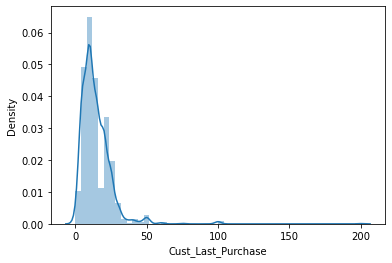

In [366]:
sns.distplot(modify_data.Cust_Last_Purchase);

#### Handling Missing Value for `Pur_3_years_Avg_Indirect` column 

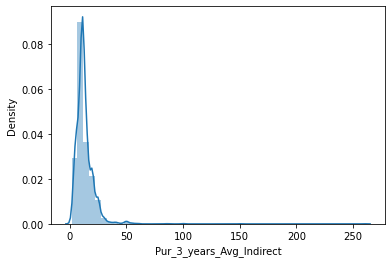

In [367]:
#Impute the missing values for Pur_3_years_Avg_Indirect columns
modify_data.Pur_3_years_Avg_Indirect.fillna(modify_data.Pur_3_years_Avg_Indirect.median(), inplace=True)
sns.distplot(modify_data.Pur_3_years_Avg_Indirect);

#### Handling Missing Value for `Age` column

Changes for Age is omitted since it is not relevant to change missing value of age to 0.

In [368]:
#Replace the missing values(values lower than 14) for Age column 
age_replace = modify_data.loc[modify_data.Age < 14].Age.value_counts().index.tolist()
modify_data.Age.replace(age_replace,np.nan,inplace=True)
modify_data.Age.fillna(method='bfill',inplace=True)

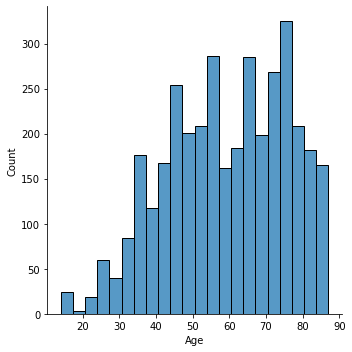

In [369]:
#Impute the missing values for Age columns
sns.displot(modify_data.Age);

#### Handling Missing Value for `Cust_Ann_Income` column 

In [370]:
modify_data[modify_data['Cust_Ann_Income'] == 0].shape

(728, 24)

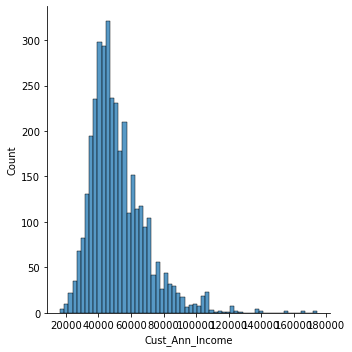

In [371]:
modify_data.Cust_Ann_Income.replace(0, np.nan, inplace=True)
modify_data.Cust_Ann_Income.fillna(method='ffill', inplace=True)
sns.displot(modify_data.Cust_Ann_Income);
plt.tight_layout()

#### Handling Missing Value for `Gender` column

In [372]:
#Replace the missing values for Gender column
print(modify_data.Gender.value_counts())

# Assign the gender randomly to replace the Unknown values
modify_data.Gender.replace('U', 'M', inplace=True)
print()
print(modify_data.Gender.value_counts())

F    1922
M    1530
U     166
Name: Gender, dtype: int64

F    1922
M    1696
Name: Gender, dtype: int64


### Explore the Relationship between Numerical Variables & Target Variable

In [373]:
for_histogram = modify_data.drop(columns='Potential_Customer')

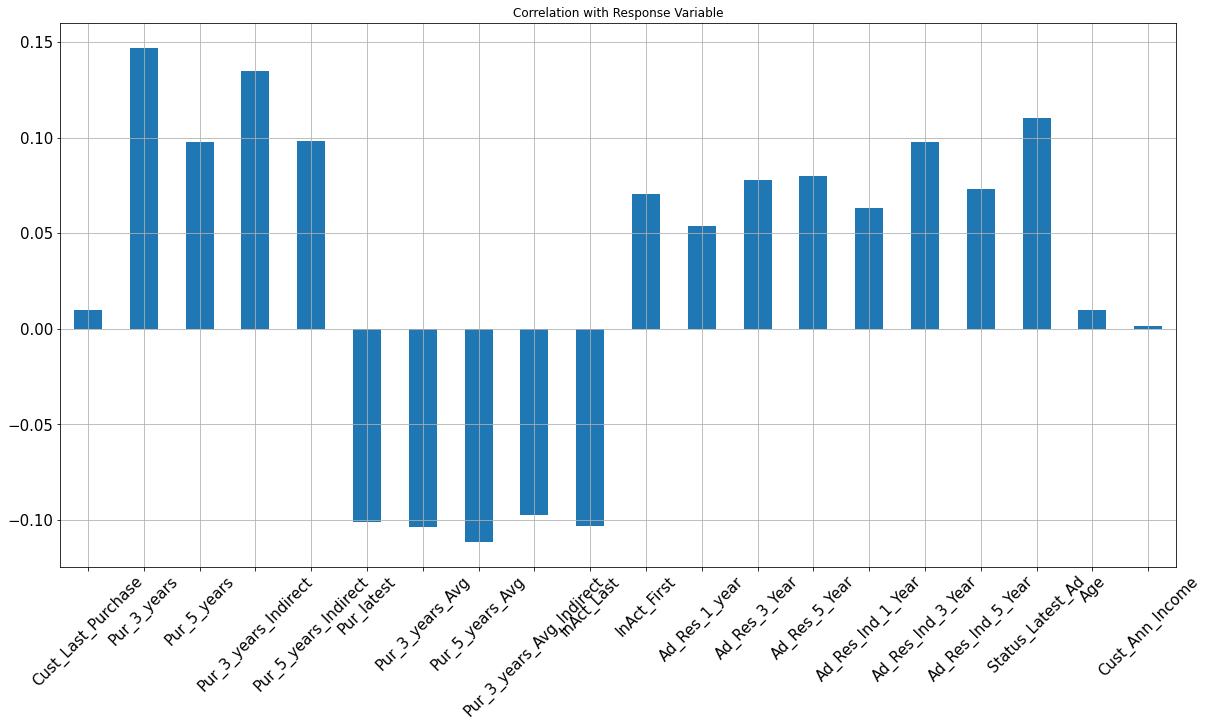

In [374]:
for_histogram.corrwith(modify_data.Potential_Customer).plot.bar(figsize=(20,10),
                       title='Correlation with Response Variable',
                       fontsize=15, rot=45, grid=True);

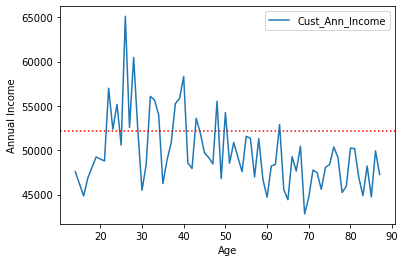

In [375]:
status_ann = modify_data.groupby('Age',).median().reset_index()
status_ann.plot.line('Age','Cust_Ann_Income');
plt.axhline(np.mean(modify_data.Cust_Ann_Income), color='r', ls=':');
plt.ylabel('Annual Income');

# <font color=green>Insights through data visualization<font>

### Create a chart to visualize potential customer breakdown

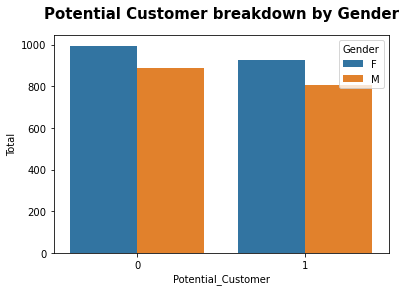

In [376]:
sns.countplot(x='Potential_Customer', hue= 'Gender', data=modify_data);
plt.title('Potential Customer breakdown by Gender', fontsize=15, y=1.05, weight='bold');
plt.ylabel('Total');

### How is the Age of the customers distributed? Plot your Answer with the appropriate chart

In [377]:
from scipy.stats import *

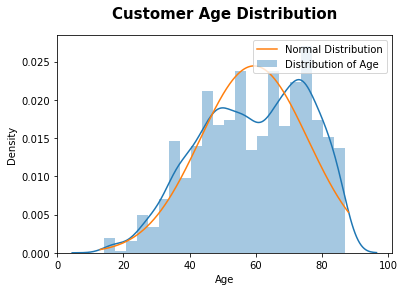

In [378]:
sns.distplot(modify_data['Age'], label='Distribution of Age')
x=np.linspace(min(modify_data['Age'])-1, max(modify_data['Age'])+1, 2000)
y=norm.pdf(x,loc=np.mean(modify_data['Age']), scale=modify_data['Age'].std(ddof=1))
plt.title('Customer Age Distribution', fontsize=15, weight='bold', y=1.05);
plt.plot(x,y, label='Normal Distribution')
plt.legend(loc='upper right');

### Explore the data by visualizing other features (such as customer annual income, distribution of gender)
- Start by asking questions that can add value to the business (example: how did my customers behaving lately?)
- Then continue by identifying which data are needed for the questions to be answered

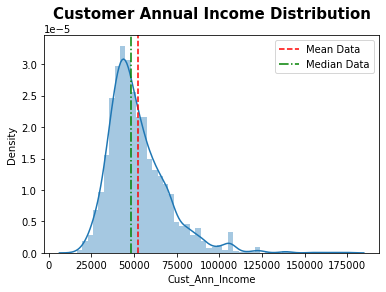

In [379]:
plt.title('Customer Annual Income Distribution', fontsize=15, weight='bold', y=1.05);
sns.distplot(modify_data.Cust_Ann_Income);
plt.axvline(np.mean(modify_data.Cust_Ann_Income), ls="--", label="Mean Data", color='r');
plt.axvline(np.median(modify_data.Cust_Ann_Income), ls="-.", label="Median Data", color='g');
plt.legend();


### What is the distribution of customers' last purchase


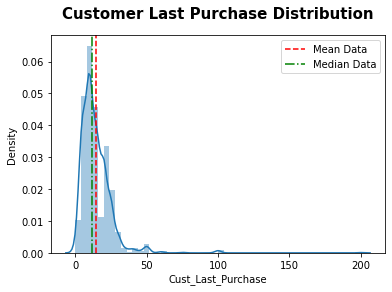

In [380]:
plt.title('Customer Last Purchase Distribution', fontsize=15, weight='bold', y=1.05);
sns.distplot(modify_data.Cust_Last_Purchase);
plt.axvline(np.mean(modify_data.Cust_Last_Purchase), ls="--", label="Mean Data", color='r');
plt.axvline(np.median(modify_data.Cust_Last_Purchase), ls="-.", label="Median Data", color='g');
plt.legend();

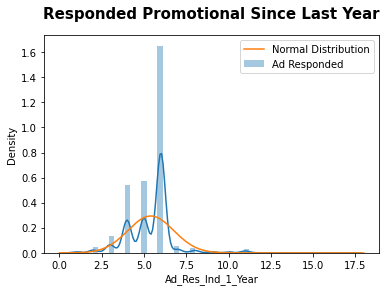

In [381]:
sns.distplot(modify_data['Ad_Res_Ind_1_Year'], label='Ad Responded')
x=np.linspace(min(modify_data['Ad_Res_Ind_1_Year'])-1, max(modify_data['Ad_Res_Ind_1_Year'])+1, 2000)
y=norm.pdf(x,loc=np.mean(modify_data['Ad_Res_Ind_1_Year']), scale=modify_data['Ad_Res_Ind_1_Year'].std(ddof=1))
plt.title('Responded Promotional Since Last Year', y=1.05, fontsize=15, weight='bold')
plt.plot(x,y, label='Normal Distribution');
plt.legend();

### What's the Purchase amount pattern with regards to Gender

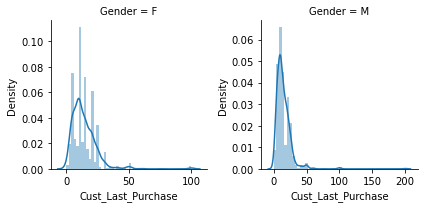

In [382]:
g = sns.FacetGrid(modify_data, col = "Gender", sharex = False, sharey = False)
g.map(sns.distplot, "Cust_Last_Purchase");

### On average, which group of gender has the higher latest purchase amount?


In [383]:
modify_data.groupby('Gender').Pur_latest.sum().reset_index()

,Gender,Pur_latest
0,F,28496.25
1,M,26741.00


### What is the distribution of the status of our customers


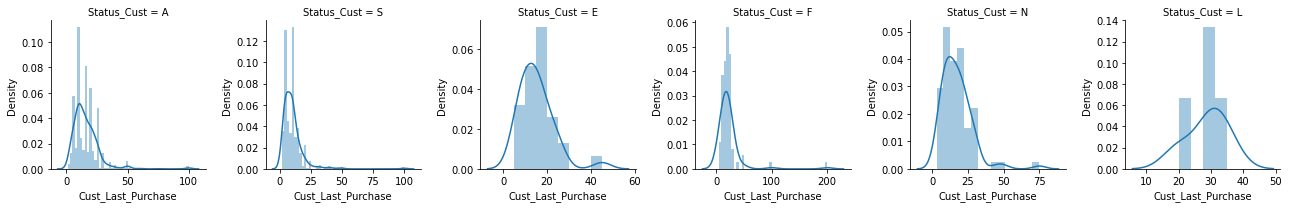

In [384]:
g = sns.FacetGrid(data, col = "Status_Cust", sharex = False, sharey = False)
g.map(sns.distplot, "Cust_Last_Purchase");

### What is the average number of purchase made in the last 3 years among different customer status


In [385]:
modify_data['total_pur_3years'] = modify_data['Pur_3_years']+modify_data['Pur_3_years_Indirect']
modify_data['total_pur_5years'] = modify_data['Pur_5_years']+modify_data['Pur_5_years_Indirect']

In [386]:
np.round(modify_data.groupby('Status_Cust').total_pur_3years.mean().reset_index())

,Status_Cust,total_pur_3years
0,A,4.0
1,E,4.0
2,F,2.0
3,L,4.0
4,N,3.0
5,S,8.0


### What is the average number of purchase made in the last 5 years among different customer status


In [387]:
np.round(modify_data.groupby('Status_Cust').total_pur_5years.mean().reset_index())

,Status_Cust,total_pur_5years
0,A,14.0
1,E,13.0
2,F,3.0
3,L,18.0
4,N,4.0
5,S,30.0


### What is the distribution of the inactive number of months since last purchase?


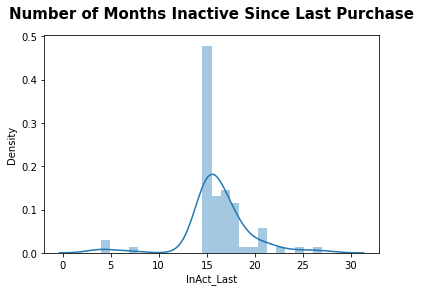

In [388]:
sns.distplot(modify_data[modify_data.Status_Cust == 'E'].InAct_Last);
plt.title('Number of Months Inactive Since Last Purchase', fontsize=15, weight='bold', y=1.05);

### What is the average number of purchase made in the last 3 years among different gender


In [389]:
np.round(modify_data.groupby('Gender').total_pur_3years.mean().reset_index())

,Gender,total_pur_3years
0,F,5.0
1,M,5.0


### Check the distribution of customers who responded to ads in past 5 years with By Gender

In [390]:
modify_data.columns

Index(['Potential_Customer', 'Cust_Last_Purchase', 'Pur_3_years',
       'Pur_5_years', 'Pur_3_years_Indirect', 'Pur_5_years_Indirect',
       'Pur_latest', 'Pur_3_years_Avg', 'Pur_5_years_Avg',
       'Pur_3_years_Avg_Indirect', 'InAct_Last', 'InAct_First',
       'Ad_Res_1_year', 'Ad_Res_3_Year', 'Ad_Res_5_Year', 'Ad_Res_Ind_1_Year',
       'Ad_Res_Ind_3_Year', 'Ad_Res_Ind_5_Year', 'Status_Cust',
       'Status_Latest_Ad', 'Age', 'Gender', 'Cust_Prop', 'Cust_Ann_Income',
       'total_pur_3years', 'total_pur_5years'],
      dtype='object')

In [391]:
# addign new column of total of add responded according to years
modify_data['total_ad_res_1year'] = modify_data.Ad_Res_1_year + modify_data.Ad_Res_Ind_1_Year
modify_data['total_ad_res_3years'] = modify_data.Ad_Res_3_Year + modify_data.Ad_Res_Ind_3_Year
modify_data['total_ad_res_5years'] = modify_data.Ad_Res_5_Year + modify_data.Ad_Res_Ind_5_Year

#### Plot By gender

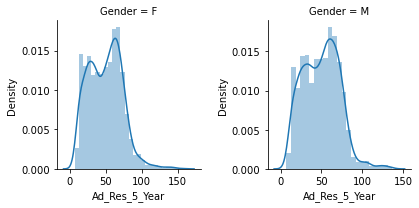

In [392]:
g = sns.FacetGrid(modify_data, col = "Gender", sharex = False, sharey = False)
g.map(sns.distplot, "Ad_Res_5_Year");

#### Plot By Customer Status

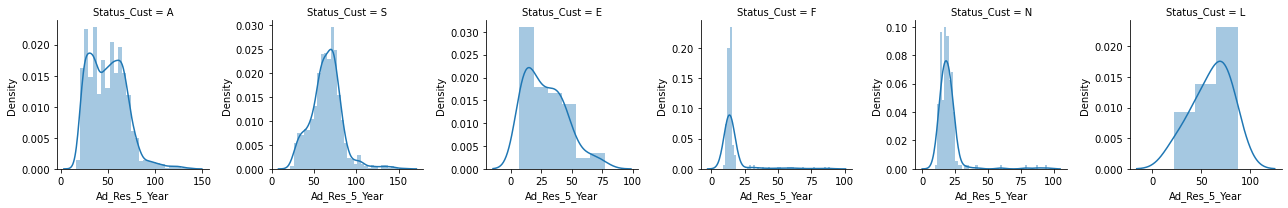

In [393]:
g = sns.FacetGrid(modify_data, col = "Status_Cust", sharex = False, sharey = False)
g.map(sns.distplot, "Ad_Res_5_Year");

#### Plot By House Ownership

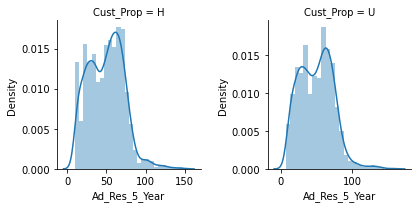

In [394]:
g = sns.FacetGrid(modify_data, col = "Cust_Prop", sharex = False, sharey = False)
g.map(sns.distplot, "Ad_Res_5_Year");

#### Summarize your findings - what have you learned from your insights?

##### Customer Annual Income Distribution
- Average customer annual income falls between 30k to 60k, an indicator that most customers come from lower to middle-class salary range.

##### Responded Promotional Since Last Year
- Most customers interact more than five times, indicating that last year ads were suitable and could be used for future ad references. 

##### Purchase amount pattern with regards to Gender
- Its shows that females and males have similar purchase patterns.
- According to the latest purchase amount, female customers buy 3.18% more than male customers.

##### Customer last purchase by customer status
- Active and star customer does contribute a lot to the sales.
- Inactive customers do a high purchase amount with less frequency since they only bought during sales.

##### Average purchase last 5  and 3 years
- There is a massive drop in the average purchase, about ten times compared to the last five years to the recent three years for A, S, E and L customers.

# <font color=green>Feature Enginearing<font>
    
### We have too many Features? Do you think you can make some high level features? 

For example: Instead of three variables for number of ads responded by customer? why not create a single variable which shows ads responded in last three years

In [395]:
# Check current dataset
clean_data = modify_data.copy()
from IPython.display import display
display(clean_data.head(3))
print(clean_data.columns)

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,total_pur_3years,total_pur_5years,total_ad_res_1year,total_ad_res_3years,total_ad_res_5years
0,1,5.0,2,17,2,4,0.0,7.5,7.76,7.50,...,0,71.0,F,H,65957.0,4,21,35,60,89
1,1,30.0,1,7,0,3,25.0,25.0,13.00,11.67,...,1,79.0,M,U,65957.0,1,10,19,41,77
2,0,20.0,5,12,3,5,15.0,15.0,11.25,14.67,...,1,79.0,F,U,65957.0,8,17,20,52,75


Index(['Potential_Customer', 'Cust_Last_Purchase', 'Pur_3_years',
       'Pur_5_years', 'Pur_3_years_Indirect', 'Pur_5_years_Indirect',
       'Pur_latest', 'Pur_3_years_Avg', 'Pur_5_years_Avg',
       'Pur_3_years_Avg_Indirect', 'InAct_Last', 'InAct_First',
       'Ad_Res_1_year', 'Ad_Res_3_Year', 'Ad_Res_5_Year', 'Ad_Res_Ind_1_Year',
       'Ad_Res_Ind_3_Year', 'Ad_Res_Ind_5_Year', 'Status_Cust',
       'Status_Latest_Ad', 'Age', 'Gender', 'Cust_Prop', 'Cust_Ann_Income',
       'total_pur_3years', 'total_pur_5years', 'total_ad_res_1year',
       'total_ad_res_3years', 'total_ad_res_5years'],
      dtype='object')


In [396]:
# Dropping redundant columns
# Since some of the columns can be merged such as purchase 3 year direct and indirect and etc.
for to_be_drop in clean_data.columns:
    if to_be_drop[:3] == 'Pur':
        clean_data.drop(columns=to_be_drop,inplace=True)
    elif to_be_drop[:2] == 'Ad':
        clean_data.drop(columns=to_be_drop,inplace=True)
display(clean_data.head(3))


,Potential_Customer,Cust_Last_Purchase,InAct_Last,InAct_First,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,total_pur_3years,total_pur_5years,total_ad_res_1year,total_ad_res_3years,total_ad_res_5years
0,1,5.0,14,110,A,0,71.0,F,H,65957.0,4,21,35,60,89
1,1,30.0,18,75,A,1,79.0,M,U,65957.0,1,10,19,41,77
2,0,20.0,19,57,S,1,79.0,F,U,65957.0,8,17,20,52,75


# <font color=green>Feature Selection<font>

### Check the correlation among the variables

In [398]:
clean_data.corr().style.background_gradient('magma')

,Potential_Customer,Cust_Last_Purchase,InAct_Last,InAct_First,Status_Latest_Ad,Age,Cust_Ann_Income,total_pur_3years,total_pur_5years,total_ad_res_1year,total_ad_res_3years,total_ad_res_5years
Potential_Customer,1.000000,0.009817,-0.103023,0.070813,0.110590,0.010069,0.001720,0.147820,0.100252,0.059448,0.093729,0.079065
Cust_Last_Purchase,0.009817,1.000000,0.062210,-0.077281,-0.108061,-0.040945,0.065460,-0.149737,-0.117835,0.017095,-0.031592,-0.058715
InAct_Last,-0.103023,0.062210,1.000000,-0.082802,-0.147530,-0.084322,0.025044,-0.216885,-0.217339,-0.552528,-0.313943,-0.214102
InAct_First,0.070813,-0.077281,-0.082802,1.000000,0.524103,0.190500,-0.063107,0.171481,0.738348,0.152712,0.384301,0.878249
Status_Latest_Ad,0.110590,-0.108061,-0.147530,0.524103,1.000000,0.129223,-0.070730,0.461088,0.614477,0.182493,0.397093,0.562739
Age,0.010069,-0.040945,-0.084322,0.190500,0.129223,1.000000,-0.069825,0.051385,0.159465,0.091895,0.090760,0.178392
Cust_Ann_Income,0.001720,0.065460,0.025044,-0.063107,-0.070730,-0.069825,1.000000,-0.052310,-0.072115,0.025483,0.010291,-0.038334
total_pur_3years,0.147820,-0.149737,-0.216885,0.171481,0.461088,0.051385,-0.052310,1.000000,0.567353,0.234646,0.504730,0.293233
total_pur_5years,0.100252,-0.117835,-0.217339,0.738348,0.614477,0.159465,-0.072115,0.567353,1.000000,0.284459,0.489367,0.799342
total_ad_res_1year,0.059448,0.017095,-0.552528,0.152712,0.182493,0.091895,0.025483,0.234646,0.284459,1.000000,0.743868,0.493455


### Create a Heatmap of correlation between the variables

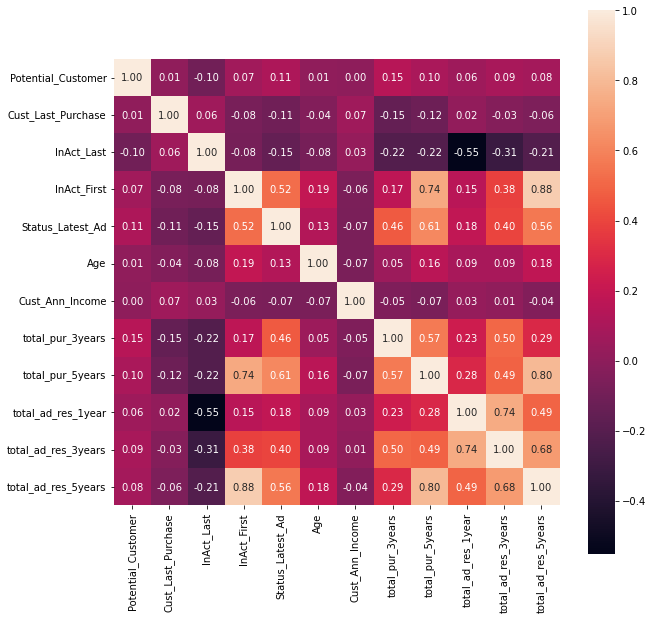

In [402]:
# More preferred way to show correlation
plt.subplots(figsize=(10,10))
sns.heatmap(clean_data.corr(), annot=True,fmt='0.2f',square=True);

### Find the Numerical Summary statistics for the variables such as mean, median, mode

In [403]:
clean_data.describe()

,Potential_Customer,Cust_Last_Purchase,InAct_Last,InAct_First,Status_Latest_Ad,Age,Cust_Ann_Income,total_pur_3years,total_pur_5years,total_ad_res_1year,total_ad_res_3years,total_ad_res_5years
count,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.00000,3618.000000,3618.000000
mean,0.479823,14.442441,17.934218,73.807352,0.568546,59.467109,52172.600608,5.217800,16.906302,18.43560,41.663074,69.122167
std,0.499662,11.282263,4.145219,38.127214,0.495348,16.327199,17565.584682,3.660472,14.000506,5.92711,11.168653,31.064605
min,0.000000,0.000000,4.000000,15.000000,0.000000,14.000000,16564.000000,0.000000,1.000000,4.00000,7.000000,10.000000
25%,0.000000,8.000000,16.000000,40.000000,0.000000,47.000000,40739.000000,2.000000,6.000000,16.00000,35.000000,43.000000
50%,0.000000,12.000000,18.000000,74.000000,1.000000,61.000000,48408.500000,4.000000,13.000000,18.00000,43.000000,70.000000
75%,1.000000,20.000000,20.000000,111.000000,1.000000,73.000000,60483.000000,7.000000,24.000000,19.00000,49.000000,93.000000
max,1.000000,200.000000,27.000000,260.000000,1.000000,87.000000,174305.000000,22.000000,130.000000,66.00000,99.000000,200.000000


### Check for outliers by either plotting box plots or IQR For all numerical variables

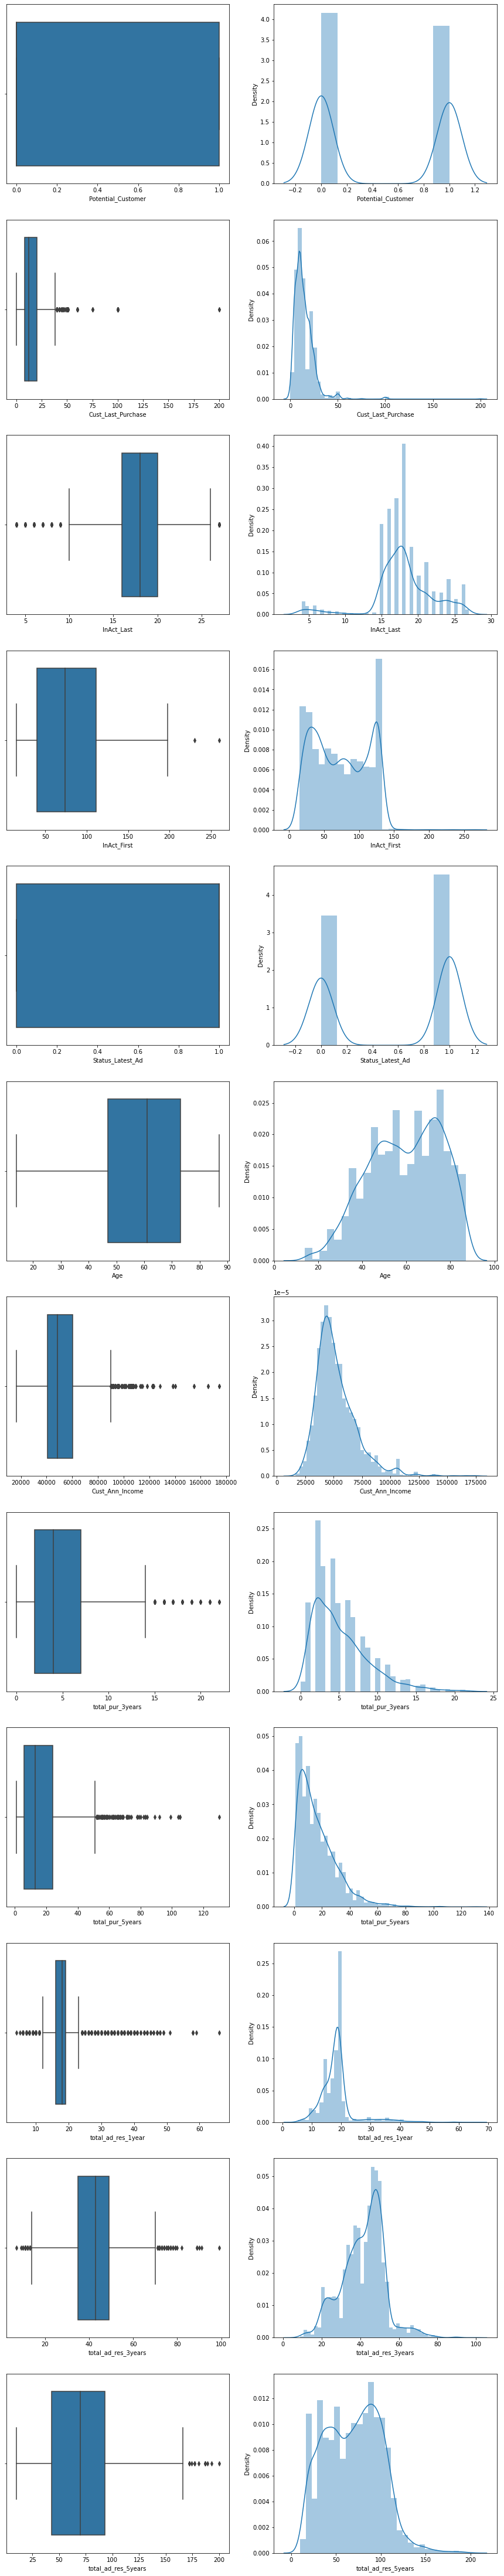

In [404]:
numeric_var = clean_data.columns[clean_data.dtypes != 'object']
fig, ax=plt.subplots(nrows=len(numeric_var), ncols=2, figsize=(15,80))
     
for num_att in range(len(numeric_var)):
    sns.boxplot(clean_data[numeric_var[num_att]], ax=ax[num_att, 0])
    sns.distplot(clean_data[numeric_var[num_att]], ax=ax[num_att, 1])

### Exporting the cleaned data

In [405]:
clean_data.to_csv('Cleaned_data.csv')